In [ ]:
# ■ 손글씨 숫자를 인식하는 신경망 만들기

In [ ]:
# 데이터 설명 : mnist 데이터는 0~9 까지의 숫자 이미지로 구성되어있고
# 			       훈련 데이터가 6만장, 테스트 데이터가 1만장으로 구성되어 있습니다.
#              28x28 크기의 회색조 이미지(1채널) 이며 각 픽셀은 0 ~ 255 까지의 값을 취합니다.

In [1]:
# 1. mnist 데이터를 불러옵니다.
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')
# 훈련                       # 테스트
# 데이터 , 정답      # 데이터 , 정답

print(x_train.shape)        # (60000,28,28)      (데이터 갯수, 가로 픽셀수, 세로 픽셀수)
print(y_train.shape)       # (60000)
print(x_test.shape)         # (10000,28,28)
print(y_test.shape)          # (10000)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
# 2.1 minmax 정규화를 실시합니다.

x_train = x_train/255.0
x_test = x_test/255.0

In [3]:
# 2.2 28x28 의 shape 를 1 x 784 로 변경합니다.

x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)


In [4]:
# 2.3 정답 데이터를 준비합니다. 

"""
원핫인코딩이란 ( onehot encoding ) ?

숫자 7을 다음과 같이 [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0 ] 만드는 것을 뜻합니다.
즉 리스트의 7번째 인덱스만 1이고 나머지는 0으로 구성하는것을 말합니다.

from tensorflow.keras.utils import to_categorical

print(to_categorical(7 , num_classes = 10))         # [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]

print( to_categorical( [7, 4, 3, 1, 9], num_classes = 10 ) )

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
"""

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print( y_train.shape )       # (60000,10)


(60000, 10)


In [5]:
# 3. 모델을 구성합니다.

# 그림 : https://cafe.daum.net/oracleoracle/Shyl/182

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add( Dense( 128, activation = 'sigmoid', input_shape = (784, ) ) )     # 은닉 1층
model.add( Dense( 10, activation = 'softmax' ) )    


In [6]:
# 4. 모델을 설정합니다. ( 경사하강법과 오차함수를 정의해줍니다. 4장에서 배움 )

model.compile( optimizer = 'adam',      # 경사하강법
			loss = 'categorical_crossentropy',      # 오차함수
			metrics = ['acc'] )     # 학습과정에서 정확도를 보려고 지정



In [ ]:
# 5. 모델을 훈련 시킵니다.

# model.fit( 훈련데이터, 정답, 에폭수, 배치사이즈 )
# 에폭수 : 학습횟수 (책을 몇번 볼건지)
# 배치사이즈 : 한번에 학습할 양 (사람을 책을 한번에 한페이지 밖에 못보지만 컴퓨터는 여러 페이지 봄)

# model.fit( x_train, y_train, epochs = 30, batch_size = 100 )
history = model.fit( x_train, y_train, epochs = 30, batch_size = 100 )
# 모델이 훈련하는 과정을 history 변수에 담습니다.
# model.fit 의 history를 남겨야한다. / model.fit 대신 위의 코드 입력


In [8]:
# 6. 모델을 평가합니다.( 시험을 봅니다. )

model.evaluate( x_test, y_test )      



313/313 [==============================] - 1s 1ms/step - loss: 0.0741 - acc: 0.9786


[0.07407256960868835, 0.978600025177002]

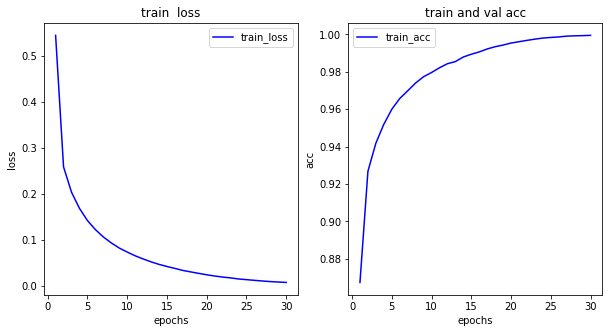

In [9]:
# 시각화
import matplotlib.pyplot as plt

his_dict = history.history              # 모델 훈련과정에서 쌓은 오차와 정확도 데이터를 불러온다
loss = his_dict['loss']                        # 훈련과정에서 기록한 30개의 오차를 loss 변수에 담습니다.

epochs = range(1, len(loss) + 1)     # 1부터 30까지의 숫자를 epochs에 담는다. , 그래프의 x 축
fig = plt.figure(figsize = (10, 5))     # 그래프 전체 사이즈 설정

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)     # 하나의 화면에 2개의 그래프 중 첫번째 그래프 그리는데 첫번째 그래프
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')  # x 축 에폭수, y 축 loss 로 라인 그래프 그림
ax1.set_title('train  loss')     # 그래프 제목
ax1.set_xlabel('epochs')       # 그래프의 x 축 제목
ax1.set_ylabel('loss')         # 그래프의 y 축 제목
ax1.legend()           

acc = his_dict['acc']       # 30개의 정확도 데이터를 acc 변수에 담습니다.

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()


In [10]:
# 7. 모델의 테스트 데이터 10000장을 입력하고 예측합니다.

result = model.predict(x_test)
print(result.shape)        # 10000, 10


(10000, 10)


In [11]:
# 위에서 출력된 확률벡터 10000개에서 가장 큰 원소의 인덱스 번호가 출력되게 하여 10000개의 숫자로 출력
		
import numpy as np

print( np.argmax(result, axis = 1).shape )         # (10000,) , axis = 1 은 가로로 최대값 찾는거


(10000,)


In [12]:
# 진짜 정답인 y_test 와 위에 예측값과 비교해서 정확도를 출력

result2 =  np.argmax(result, axis = 1)
y_test2 = np.argmax( y_test, axis = 1 )
print( sum( result2 == y_test2  )/ 10000 )       # model.evaluate 했을 때와 값이 같다.

0.9786


In [ ]:
# 테스트 데이터 10000장 중에 첫번째 테스트 데이터 1개를 신경망에 입력하고 예측 숫자를 출력하시오 !

# 숫자하나만 예측
result = model.predict(x_test[0])
result2 =  np.argmax(result, axis = 1)
print(result2)

# 위의 숫자의 정답을 확인
y_test2 = np.argmax( y_test[0], axis = 1 )
print(y_test2)

# 에러남 , why ???

# print( x_test.shape )        # (10000, 784)
# print( x_test[0].shape )      # (784,)   --------> ( 1,784 ) 이렇게 변경해야 합니다.

In [13]:
# 숫자하나만 예측
result = model.predict(x_test[0].reshape(1,784))
result2 =  np.argmax(result, axis = 1)
print(result2)          # 7

# 위의 숫자의 정답을 확인
y_test2 = np.argmax( y_test[0] )    # 1개만 볼때는 axis=1 사용안해도 됩니다.
print(y_test2)        # 7


[7]
7


In [14]:
# 테스트 데이터 10000장 중에 10000번째 숫자를 예측하고 정답과 비교

# 숫자하나만 예측
result = model.predict(x_test[9999].reshape(1,784))
result2 =  np.argmax(result, axis = 1)
print(result2)          # 6

# 위의 숫자의 정답을 확인
y_test2 = np.argmax( y_test[9999] )    # 1개만 볼때는 axis=1 사용안해도 됩니다.
print(y_test2)        # 6


[6]
6


In [ ]:
# 7. 모델을 저장합니다.

model.save("/content/drive/MyDrive/my_model.h5")

In [ ]:
#  모델 불러오기

from tensorflow.keras.models import load_model

new_model = load_model("/content/drive/MyDrive/my_model.h5")

new_model.evaluate( x_test, y_test )    

# 지금 불러온 모델에 테스트 이미지 한장을 입력하고 예측값을 출력하시오 !

result = new_model.predict(x_test[0].reshape(1,784) )
print( np.argmax(result) )        # 7

print( np.argmax(y_test[0]) )   # 7